# MEDimage Tutorial − Initiation to the MEDimage class

@Author : [MEDomics consortium](https://github.com/medomics/)

@Email : medomics.info@gmail.com


**STATEMENT**:
This file is part of <https://github.com/MEDomics/MEDomicsLab/>,
a package providing PYTHON programming tools for radiomics analysis.
--> Copyright (C) MEDomicsLab consortium.

This package is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This package is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this package.  If not, see <http://www.gnu.org/licenses/>.

## Introduction


This notebook is a tutorial for the *MEDimage* class to give a detailed introduction & explanation on the Python class. The *MEDimage* class is the main object used in the *MEDimage* package either when it comes to processing, features extraction or any other type of image analysis. It offers many attributes, child classes and many methods. This makes the *MEDimage* package an excellent tool for radiomics studies. 

Our *MEDimage* tutorial will guide you to learn everything you need about the *MEDimage* class.


The idea behind the *MEDimage* class was to convert an equivalent of the radiomics study scheme flowchart (Figure below) into a Python object.

<img src="https://ibsi.readthedocs.io/en/latest/_images/Processing_simplifiedv6.png" alt="Flowchart of radiomics study scheme" style="width:650px;"/>

And using the Python new objects (*MEDimage* and its children), we get the following flowchart

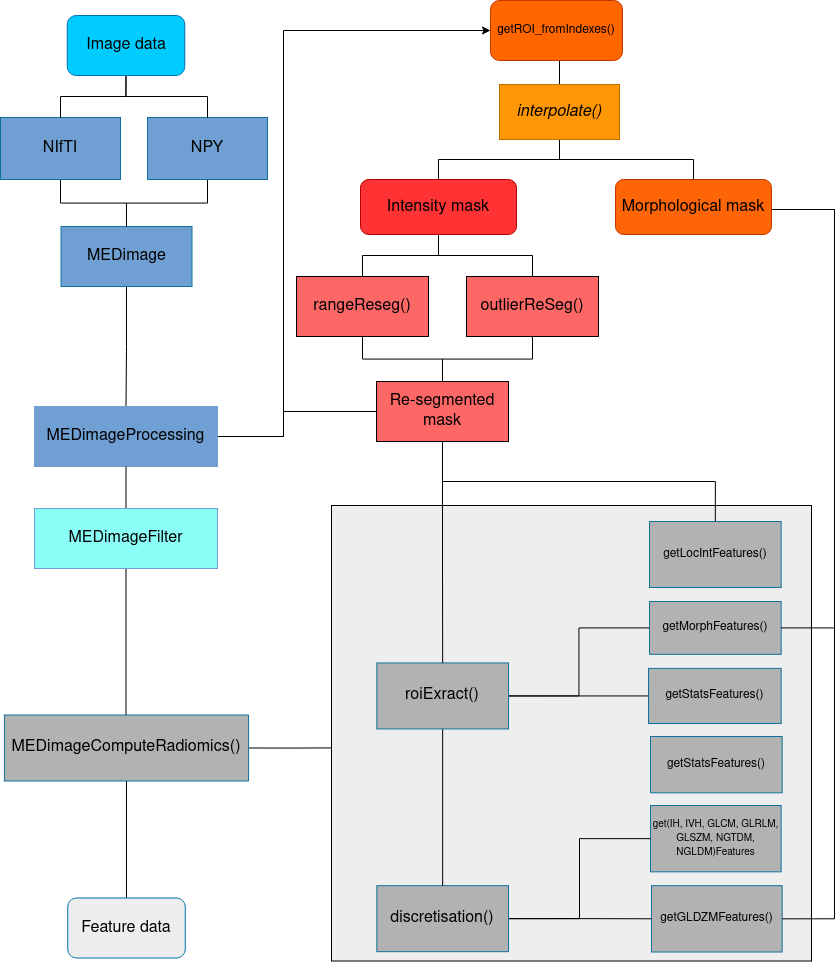

As the figures show, the *MEDimage* class is the main pillar for the *MEDimage* package architecture.

The *MEDimage* class attributes are usually data extracted from imaging data headers (DICOM header, NIfTI header...) and used for processing and computation. In addition to the attributes, the *MEDimage* class contains different class methods that are also used for the same purposes as the attributes. Finally, *MEDimage* have two sub-classes *MEDimageProcessing* and *MEDimageComputeRadiomics*. *MEDimageProcessing* is a class that inherits directly from *MEDimage* and offers many processing methods with different algorithms that are usually called before features extraction. Next, *MEDimageComputeRadiomics* inherits from *MEDimageProcessing* and offers all the computation methods needed for features extraction.

To further understand the *MEDimage* class and its children, take a look at the class diagram below that describes the structure of the *MEDimage* class, its attributes, methods and the relationships among other objects.

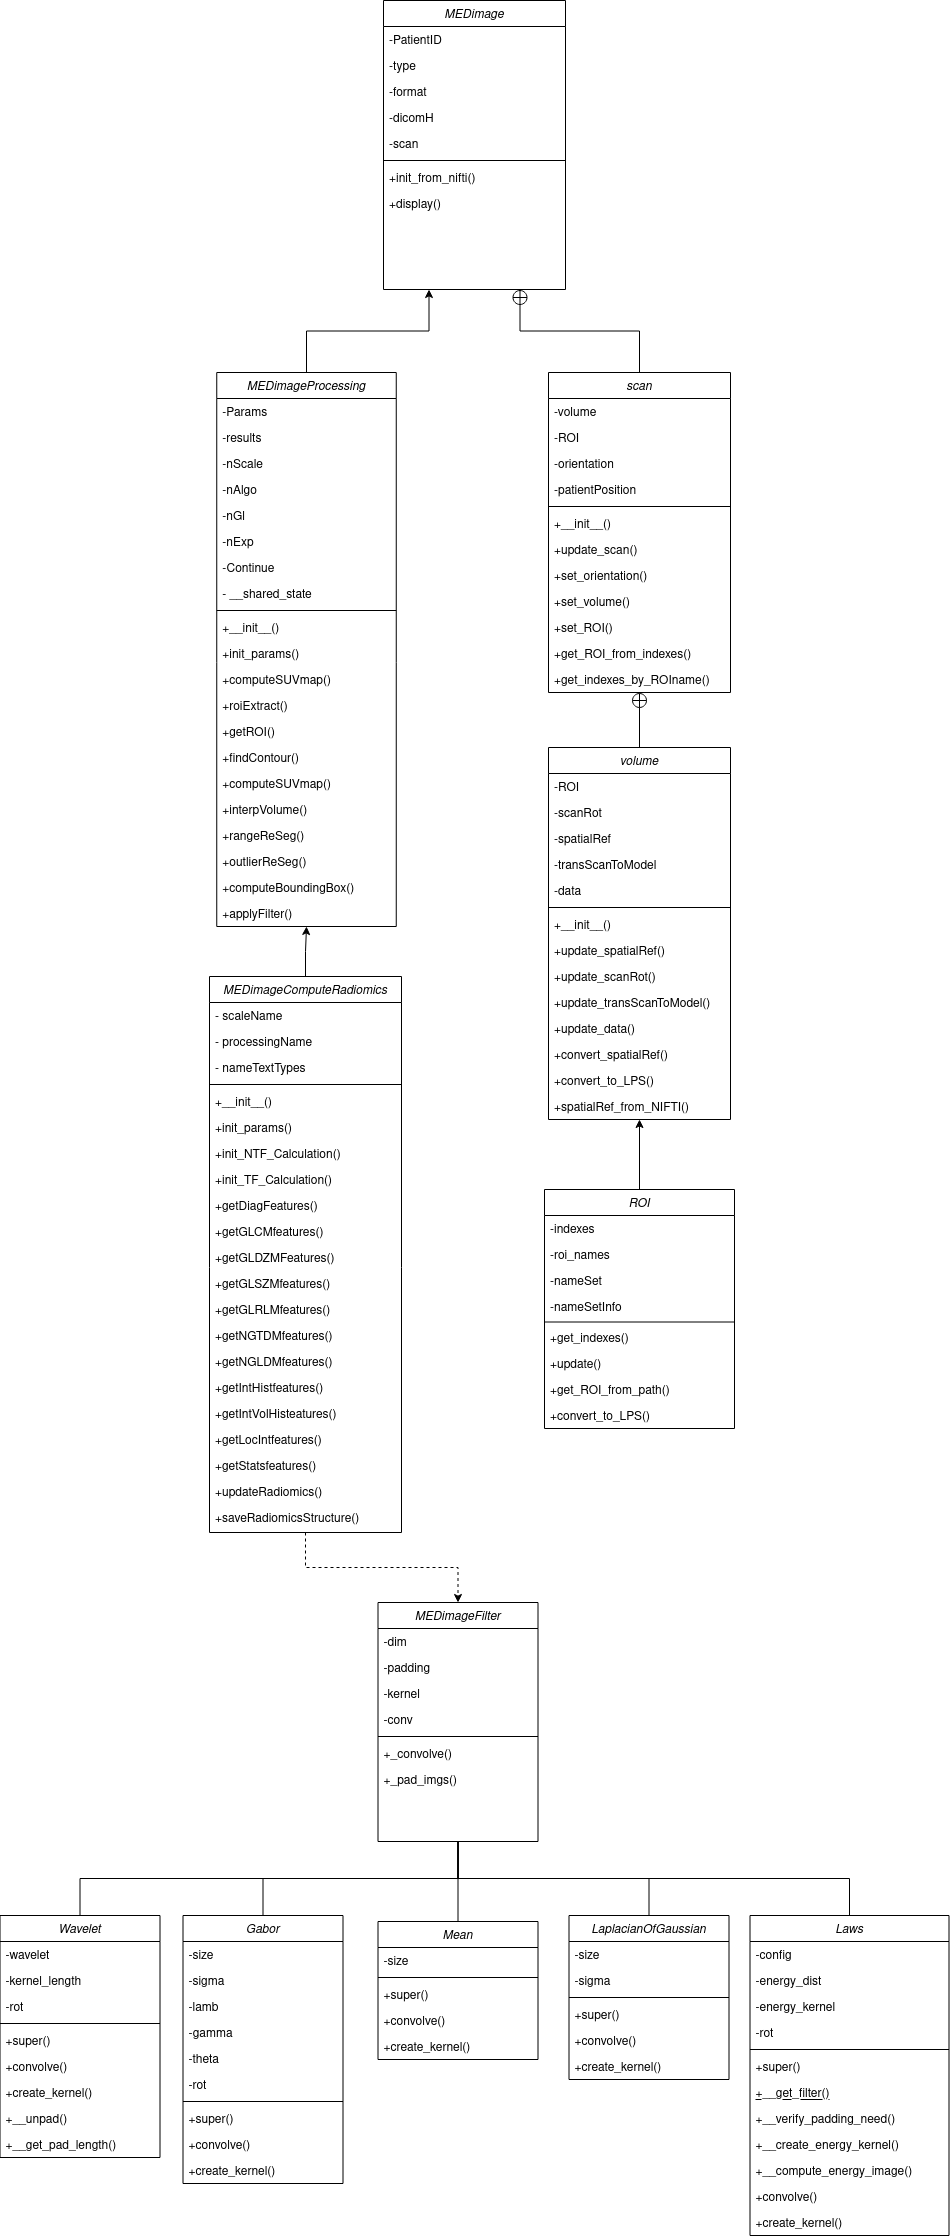

In [57]:
from copy import deepcopy
from pathlib import Path

MODULE_DIR = os.path.dirname(os.path.abspath('../MEDimage/MEDimage.py'))
sys.path.append(os.path.dirname(MODULE_DIR))

# import MEDimage classes
from MEDimage.MEDimage import MEDimage
from MEDimage.MEDimageComputeRadiomics import MEDimageComputeRadiomics
from MEDimage.MEDimageProcessing import MEDimageProcessing

In [58]:
def __processParams(imParams, scanType):
    """
    Process the computation settings.
    
    Args:
        imParams (Dict): JSON with the options that will be used during 
            the image processing and features extraction.
        scanType (str): scan type (Ex: MRscan, CTscan...).
        
    Returns:
        A dict with all the settings for the right scan type.
        
    """
    if scanType == 'MRscan':
        imParams = imParams['imParamMR']
    elif scanType == 'CTscan':
        imParams = imParams['imParamCT']
    elif scanType == 'PTscan':
        imParams = imParams['imParamPET']
    else:
        raise ValueError(r"scanType must be 'MRscan', 'PTscan' or 'CTscan'")
        
    return imParams

## MEDimage initialization

Initializing a *MEDimage* class is easy, you can either create a *MEDimage* instance and update the attributes manually (not recommended), or use the method *initMEDimage()* that will automatically create an instance of *MEDimage* and its children. Additionally, you can use *initMEDimage()* in two ways:
- Use an existent *MEDimage* class saved in an *npy* file ([pickle object](https://docs.python.org/3/library/pickle.html)). Make sure the file name respects the following norm:
    - **PatientID__ImagingScanName.ImagingModality.npy**
- Use a *NIfTI* file. For this method, you should have two NIfTI files, one for the imaging volume and the other for the volume mask (ROI). Finally make sure the files names respects the following norm:
    - Tumor volume: **PatientID__ImagingScanName(tumorAuto).ImagingModality.nii.gz**
    - ROI mask: **PatientID__ImagingScanName(tumor).ROI.nii.gz**

You will also need to set the MEDimage processing and computation settings before the initialization and organize all of it in a *JSON* file. We will now demonstrate the use of both approaches using a scan/patient i.e. we will initialize a *MEDimage* class using a *npy* file and a *NIfTI* file. You can also take a look at the *JSON* settings file in the folder *settings* to have an idea about the settings needed for processing and computation.

In [59]:
pathData = Path(os.getcwd()) / "data" # Path to the data(scan) folder
pathSettings = Path(os.getcwd()) / "settings" # Path to the script settings
imParams = jsonUtils.loadjson(pathSettings / 'MEDimage-Tutorial.json') # Processing & computation settings
imParams = __processParams(imParams, scanType='MRscan')

Finally, here some information about our scan/patient:
 - **ID**: Glioma-TCGA-02-003
 - **Imaging scan name**: T1
 - **Modality**: MRscan
 - **Regions of interest**:
     - Number of regions: 3
     - Names of ROIs: ED, ET and NET
     - ROI name: {ED}+{ET}+{NET}

In [60]:
NPYnameRead = 'Glioma-TCGA-02-0003__T1.MRscan.npy' # scan file name, npy format
NIfTInameRead = 'Glioma-TCGA-02-0003__T1(tumorAuto).MRscan.nii.gz' # scan file name, NIfTI format
nameROI = '{ED}+{ET}+{NET}' # Region of interest name
roiType = ''
roiType_label = ''

### First approach
Using a *npy* file, a file that already contains a *MEDimage* instance. We will need 4 main arguments for our method *initMEDimage()*:
- nameRead (str): name of the scan that will be used to initialize the MEDimage class and its children.
- pathRead (Path): Path to the scan file.
- roiType (str): ROI type.
- imParams (Dict): Dict of the test parameters.
- log_file (str): Name of the log file that will be used.

**PS**: Since *MEDimageProcessing* inherits from *MEDimage* and *MEDimageComputeRadiomics* inherits from *MEDimageProcessing*, we will only need *MEDimageProcessing* and *MEDimageComputeRadiomics* instances in the tutorial.

In [61]:
from MEDimage.utils.initMEDimage import initMEDimage

MEDimageProcess_npy, MEDimageCR_npy = initMEDimage(NPYnameRead, 
                                           pathData, 
                                           roiType, 
                                           imParams, 
                                           'log_file_MEDimage_tuto.txt')

In [62]:
MEDimageProcess_npy.format

'npy'

### Second approach
Using *NIfTI* files, we will need two files, one contains imaging data and the other contains the ROI mask. Finally, We will need the same arguments for our method *initMEDimage()* (i.e. same arguments but different values)

**PS**: Since *MEDimageProcessing* inherits from *MEDimage* and *MEDimageComputeRadiomics* inherits from *MEDimageProcessing*, we will only need *MEDimageProcessing* and *MEDimageComputeRadiomics* instances in the tutorial.

In [63]:
# we use deepcopy so we can have two MEDimage instances at the same time (npy instance and NIfTI instance).
MEDimageProcess_npy = deepcopy(MEDimageProcess_npy)
MEDimageCR_npy = deepcopy(MEDimageCR_npy)

In [64]:
from MEDimage.utils.initMEDimage import initMEDimage

MEDimageProcess_nifti, MEDimageCR_nifti = initMEDimage(NIfTInameRead, 
                                           pathData, 
                                           roiType, 
                                           imParams, 
                                           'log_file_MEDimage_tuto.txt')

## MEDimage exploration

We have now initialized *MEDimage* successfully, let's have fun exploring the class attributes for both approaches. The *MEDimage* attributes are as follows:
- *PatientID*
- *type*
- *format*
- *dicomH*
- *scan*

We are going to explore each and every attribute

###  - Patient ID
A special identification string for each patient/scan.

In [65]:
MEDimageProcess_nifti.patientID

'Glioma-TCGA-02-0003'

In [66]:
MEDimageProcess_npy.patientID

'Glioma-TCGA-02-0003'

###  - Type
Scan type, usually: *MRscan*, *CTscan*, *PETscan*...

In [67]:
MEDimageProcess_nifti.type

'MRscan'

In [68]:
MEDimageProcess_npy.type

'MRscan'

###  - Format
The format used to initialize the current *MEDimage* class

In [69]:
MEDimageProcess_npy.format

'npy'

In [70]:
MEDimageProcess_nifti.format

'nifti'

As we can see the format is not the same for both instances since we used different formats for initialization.

###  - scan (inner class)
A *MEDimage* inner class that holds all the imaging data (volume and ROI) and other important information. It has the following attributes:
- *orientation*: Imaging data anatomical plane (sagittal plane, coronal plane or axial plane)
- *patientPosition*: Position of the patient relative to the imaging equipment space (HFS, HFP...)

In [71]:
MEDimageProcess_nifti.scan.orientation

'Axial'

In [72]:
MEDimageProcess_nifti.scan.patientPosition

'HFS'

- volume : A *scan* inner class that holds imaging volume data and other information. It has the following attributes:
    - *spatialRef*: same functionality of [MATLAB imref3d class](https://www.mathworks.com/help/images/ref/imref3d.html).
    - *scanRot*: array of the rotation applied to the imaging data (if that's the case)
    - *data*: Array of the imaging data

Little exploration of the *data* attribute

In [73]:
# volume data
MEDimageProcess_nifti.scan.volume.data.shape

(240, 240, 155)

And we can visualize this data using the *display()* method

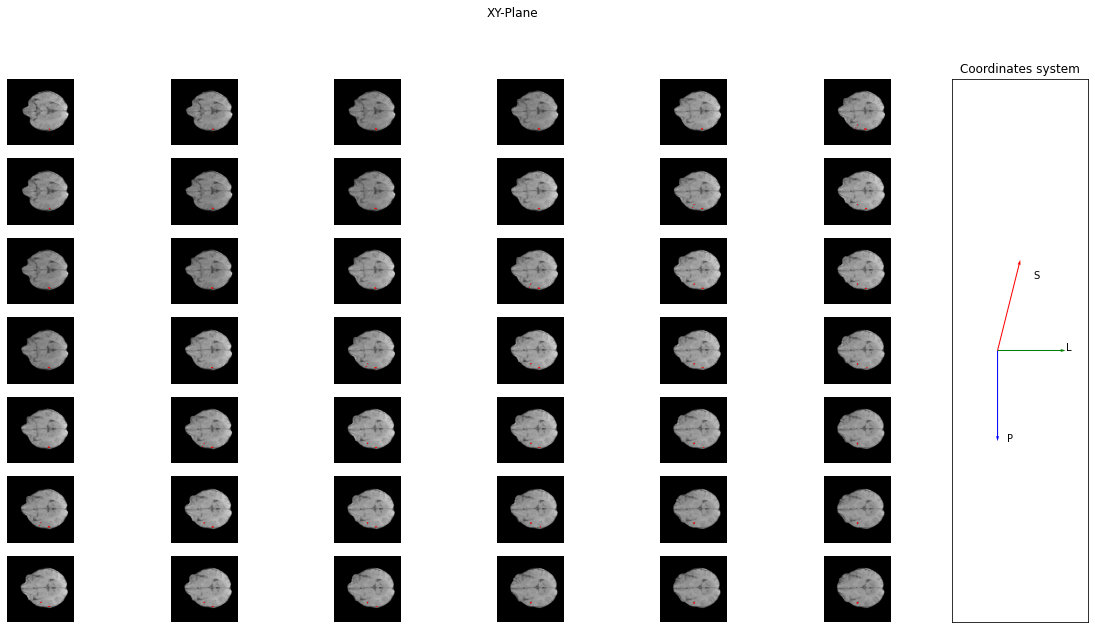

In [74]:
MEDimageProcess_nifti.display()

Let's check if the volume imaging data is the same for both formats (*npy* and *NIfTI*)

In [75]:
MEDimageProcess_nifti.scan.volume.data.all() == MEDimageProcess_npy.scan.volume.data.all()

True

*scanRot* attribute

In [76]:
# scan rotation (usually None)
MEDimageProcess_nifti.scan.volume.scanRot

*SpatialRef* exploration

Span of image in the x-dimension in the world coordinate system

In [77]:
MEDimageProcess_nifti.scan.volume.spatialRef.ImageExtentInWorldX

240.0

Spatial Reference: Span of image in the y-dimension in the world coordinate system

In [78]:
MEDimageProcess_nifti.scan.volume.spatialRef.ImageExtentInWorldY

240.0

Spatial Reference: Span of image in the z-dimension in the world coordinate system

In [79]:
MEDimageProcess_nifti.scan.volume.spatialRef.ImageExtentInWorldZ

155.0

- ROI : A *scan* inner class that holds mask data and other information. It has the following attributes:
    - *indexes*: Dict of the ROI indexes for each ROI name.
    - *roi_names*: Dict of the ROI names for the imaging data.
    - *nameSet* (Not crucial for features extraction): Dict of the User-defined name for Structure Set for each ROI name.
    - nameSetInfo* (Not crucial for features extraction): Dict of the names of the structure sets that define the areas of significance. Either 'StructureSetName', 'StructureSetDescription', 'SeriesDescription' or 'SeriesInstanceUID'.

*indexes*: the indexes are just integers that point to the region of interest. For each ROI name we have a list of indexes. For our case we have 3 ROIs: *ED*, *ET* and *NET* so that makes three lists of ROI indexes. Let's see what that looks like in the code (we should have a *dict* of size 3)

In [80]:
MEDimageProcess_nifti.scan.ROI.indexes

{'0': (array([4342849, 4490109, 4490261, ..., 6128782, 6165980, 6165981]),),
 '1': (array([4155453, 4155454, 4155455, ..., 6089264, 6126310, 6163506]),),
 '2': (array([3261253, 3261254, 3261255, ..., 7390786, 7390787, 7390788]),)}

As mentioned in the introduction, the ROI names are : *ED*, *ET* and *NET*, we must have the same names in our class instance, let's check...

In [81]:
MEDimageProcess_nifti.scan.ROI.roi_names

{'0': 'ET', '1': 'ED', '2': 'NET'}

Finally, the two final attributes are *nameSet* and *nameSetInfo* are not used in any part of the code and are here for description.

In [82]:
MEDimageProcess_nifti.scan.ROI.nameSet

{'0': 'T1', '1': 'T1', '2': 'T1'}

In [83]:
MEDimageProcess_nifti.scan.ROI.nameSetInfo

{}

Let's try to change the value of some attributes, for example: we would like to change the ROI name for index *2*, which means we will replace *'NET'* with *'tumor'* 

In [84]:
MEDimageProcess_nifti.scan.ROI.update_ROIname(2, 'tumor')
MEDimageProcess_nifti.scan.ROI.roi_names

{'0': 'ET', '1': 'ED', '2': 'tumor'}

You can update every class attribute value using the right class methods for that (check the class diagram above)